In [ ]:
%matplotlib inline

<h2>Transformada de Fourier</h2>
Filtros no domínio da Frequência
Fourier Transform in Numpy
Vamos aprender como encontrar a Transformada de Fourier utilizando o Numpy. Numpy tem um pacote FFT para fazer isso. np.fft.fft2() provê a transformação para o domínio da frequência, que será uma matriz (array) complexa. O primeiro argumento é a imagem de entrada, que é nível de cinza. O segundo argumento é opcional que decide o tamanho da matriz de saída. Se nenhum argumento é passado, o tamanho da matriz de saída será o mesmo da entrada.

Uma vez que temos o resultado, a componente de frequência zero (componente DC) estará no topo esquerdo. Se queremos trazê-la para o centro, precisamos deslocar o resultado por  N2  em ambas as direções. Isto é feito automagicamente pela função np.fft.fftshift()

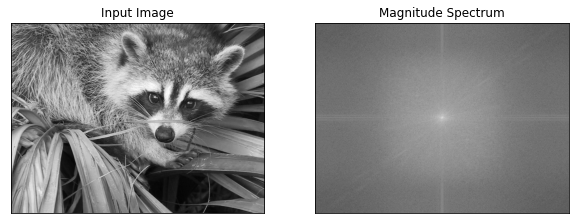

In [ ]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
rcParams['figure.figsize'] = 10, 10

#img = io.imread('/home/mario/docs/cursos/pdivc/images/messi5.jpg')
img_c = misc.face()
img = rgb2gray(img_c)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(np.abs(fshift)),cmap='gray')
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

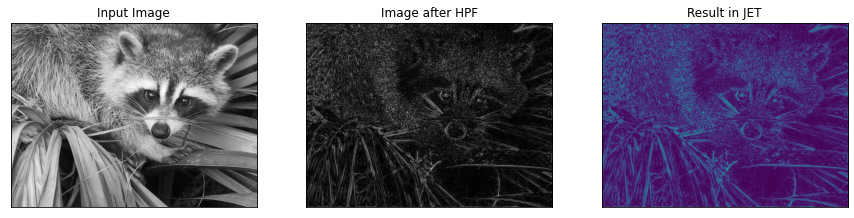

In [ ]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

rcParams['figure.figsize'] = 15, 10

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc

def butter2d_lp(shape, f, n, pxd=1): 
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
    frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
    degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape 
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis]) 
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt

def butter2d_bp(shape, cutin, cutoff, n, pxd=1):
    """Designs an n-th order bandpass 2D Butterworth filter with cutin and
    cutoff frequencies. pxd defines the number of pixels per unit of frequency
    (e.g., degrees of visual angle)."""
    return butter2d_lp(shape,cutoff,n,pxd) - butter2d_lp(shape,cutin,n,pxd)

def butter2d_hp(shape, f, n, pxd=1):
    """Designs an n-th order highpass 2D Butterworth filter with cutin
    frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
    degrees of visual angle)."""
    return 1. - butter2d_lp(shape, f, n, pxd)

def ideal2d_lp(shape, f, pxd=1):
    """Designs an ideal filter with cutoff frequency f. pxd defines the number
    of pixels per unit of frequency (e.g., degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape 
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis]) 
    filt = np.ones(shape)
    filt[radius>f] = 0
    return filt

def ideal2d_bp(shape, cutin, cutoff, pxd=1):
    """Designs an ideal filter with cutin and cutoff frequencies. pxd defines
    the number of pixels per unit of frequency (e.g., degrees of visual
    angle)."""
    return ideal2d_lp(shape,cutoff,pxd) - ideal2d_lp(shape,cutin,pxd)

def ideal2d_hp(shape, f, n, pxd=1):
    """Designs an ideal filter with cutin frequency f. pxd defines the number
    of pixels per unit of frequency (e.g., degrees of visual angle)."""
    return 1. - ideal2d_lp(shape, f, n, pxd)

def bandpass(data, highpass, lowpass, n, pxd, eq='histogram'):
    """Designs then applies a 2D bandpass filter to the data array. If n is
    None, and ideal filter (with perfectly sharp transitions) is used
    instead."""
    fft = np.fft.fftshift(np.fft.fft2(data))
    if n:
        H = butter2d_bp(data.shape, highpass, lowpass, n, pxd)
    else:
        H = ideal2d_bp(data.shape, highpass, lowpass, pxd)
    fft_new = fft * H
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))    
    if eq == 'histogram':
        new_image = exposure.equalize_hist(new_image)
    return new_image

Crie uma imagem de 30x30, preenchida com zeros e depois crie um retângulo de 5:24 em x e de 13:17 em y, com valor 1.
Depois calcule a Transformada Rápida de Fourier (fft2), e obtenha uma imagem (magnitude do espectro), conforme mostrado.

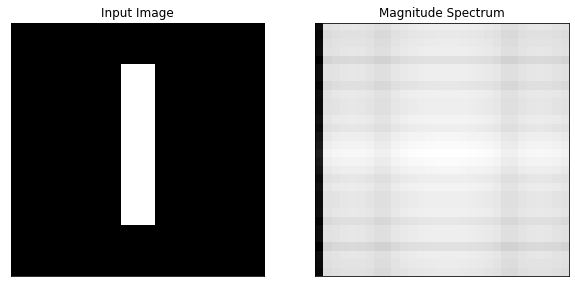

In [ ]:
img_bw = np.zeros([30, 30, 3], dtype=np.uint8)
img_bw[5:24, 13:17] = (1, 1, 1)

img_c = img_bw
img = rgb2gray(img_c)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(np.abs(fshift)),cmap='gray')
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Crie uma nova imagem adicionando zeros à imagem do retângulo (isto é chamado de padding) de modo que ela fique com tamanho 256x256 e então calcule novamente a Transformada de Fourier e comente as diferenças dos espectros.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


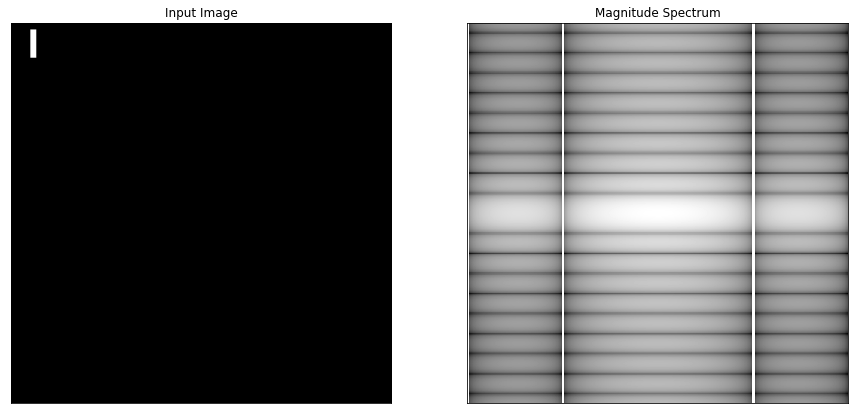

In [ ]:
img_bw = np.zeros([256, 256, 3], dtype=np.uint8)
img_bw[5:24, 13:17] = (1, 1, 1)

img_c = img_bw
img = rgb2gray(img_c)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(np.abs(fshift)),cmap='gray')
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Agora faça um shift da Transformada, reposicionando-a, de modo que a origem fique no centro da imagem.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


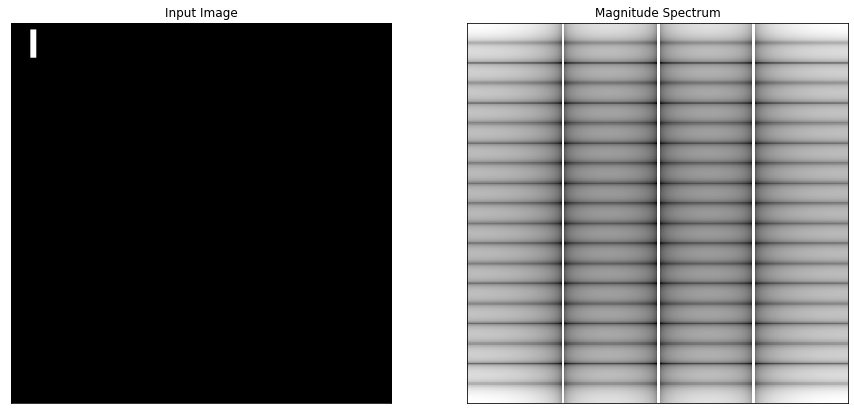

In [ ]:
img_bw = np.zeros([256, 256, 3], dtype=np.uint8)
img_bw[5:24, 13:17] = (1, 1, 1)

img_c = img_bw
img = rgb2gray(img_c)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift = np.fft.fftshift(fshift)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(np.abs(fshift)),cmap='gray')
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

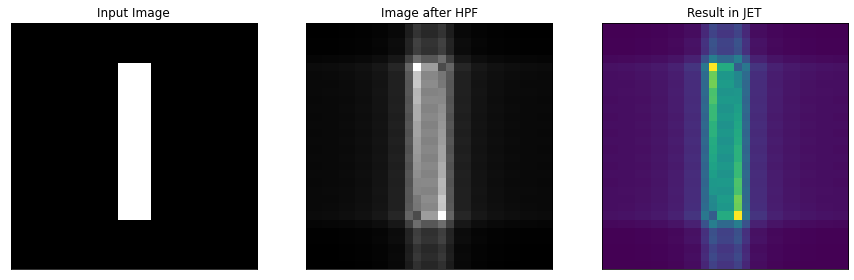

In [ ]:
img_bw = np.zeros([30, 30, 3], dtype=np.uint8)
img_bw[5:24, 13:17] = (1, 1, 1)

img_c = img_bw
img = rgb2gray(img_c)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

img_c = img_bw
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

rcParams['figure.figsize'] = 15, 10

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

<h2>Exercício 2</h2>
Aplique um Filtro Gaussiano passa-baixa na imagem da bola de futebol americano (você deve baixar a imagem do Moodle e carregar aqui no Notebook). Lembre-se de fazer o padding da imagem de modo que ela fique com dimensões que sejam potência de 2, e seja uma imagem quadrada. Você deve mostrar a imagem original, o espectro de Fourier (magnitude do espectro), a imagem da bola após a aplicação do filtro e o espectro de Fourier filtrado com o Filtro Gaussiano passa-baixa.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # Remove the CWD from sys.path while we load stuff.


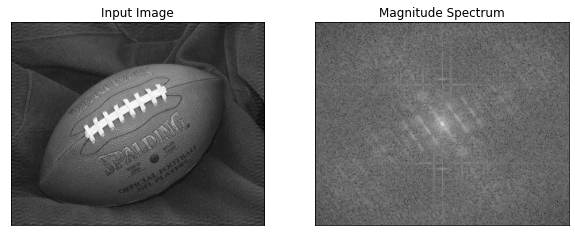

In [ ]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from pylab import rcParams
from scipy import misc
rcParams['figure.figsize'] = 10, 10

imgfixed_ball = io.imread('/content/fixed_football.png')
img = rgb2gray(imgfixed_ball)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(np.abs(fshift)),cmap='gray')
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

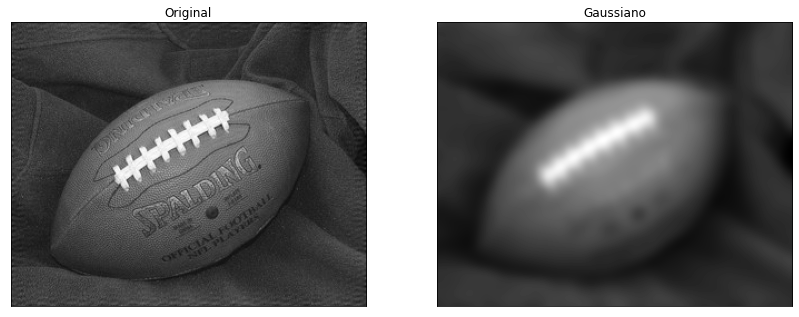

In [ ]:
from skimage.filters import gaussian


fig = plt.figure(figsize=(14, 7))
dst = gaussian(imgfixed_ball,sigma=5,multichannel=False)
plt.subplot(121),plt.imshow(imgfixed_ball,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Gaussiano')

plt.xticks([]), plt.yticks([])
plt.show()

<h2>Exercício 3</h2>
Aplique um Filtro Gaussiano passa-alta na imagem da bola de futebol americano. Lembre-se de fazer o padding da imagem original para ficar com dimensões potência de 2 e seja uma imagem quadrada. Você deve mostrar o espectro de Fourier (magnitude do espectro), a imagem da bola após a aplicação do Filtro e o espectro de Fourier filtrado.

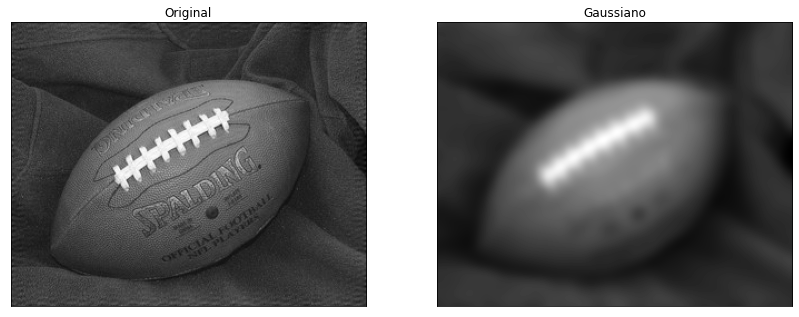

In [ ]:
from skimage.filters import gaussian

imgfixed_ball = io.imread('/content/fixed_football.png')

fig = plt.figure(figsize=(14, 7))
dst = gaussian(imgfixed_ball,sigma=5,multichannel=False)
plt.subplot(121),plt.imshow(imgfixed_ball,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Gaussiano')

plt.xticks([]), plt.yticks([])
plt.show()

<h2>Exercício 4</h2>
Filtros de entalhe (recorte, pontuais):

são utilizados para remover ruído espectral repetitivo de uma imagem;
são como um pequeno filtro passa alta, mas eles recortam (removem) frequências específicas, ao invés da componente dc, dc component
atenua uma frequência selecionada (e algumas de suas vizinhas) e deixa as outras frequências da transformada de Fourier relativamente não modificadas.
podemos construir tipos diferentes de filtros de entalhe a partir dos filtros exemplificados anteriormente:
"ideal" - um filtro ideal passa alta com uma frequência de corte D0 (D0 > 0)
"butterworth" - um filtro butterworth passa alta de ordem n, e corte D0. Valor default de n é 1.0 (D0 > 0)
"gaussiano" - um filtro gaussiano passa alta com um frequência de corte (desvio padrão) D0 (D0 > 0)
Estes filtros podem ser implementados com uma função do tipo:

entalhe(tipo, M, N, D0, x, y, n)

função para aplicar o filtro de entalhe do tipo especificado, dentrado na coluna x, linha y, em um espectro de Fourier não deslocado. D0 é a frequẽncia de corte e n é a ordem do filtro Butterworth; não usado para os demais tipos.
Ruído repetitivo em uma imagem é algumas vezes visto como um ponto brilhante, diferente da origem. É possível suprimir tal ruído efetivamente através da remoção cuidadosa destes picos. Uma maneira de se fazer isso é utilizar um filtro de entalhe que simplesmente remove aquela frequência da imagem. Esta técnica é muita comum no processamento de sinais de áudio, onde ela é utilizada para remover zumbidos mecânicos ou eletrônicos, tais como o zumbido de 60Hz de fontes de corrente alternada (AC). Normalmente, estes filtros são criados através de procedimentos ad hoc, requerendo um expert humano para determinar quais frequências que devem ser removidas para limpar o sinal.

As imagens a seguir demonstram este procedimento de se remover um ruído espectral de uma imagem. Para executar o código a seguir, você deve colocar as imagens em um caminho acessível ao notebook e mudar no código.

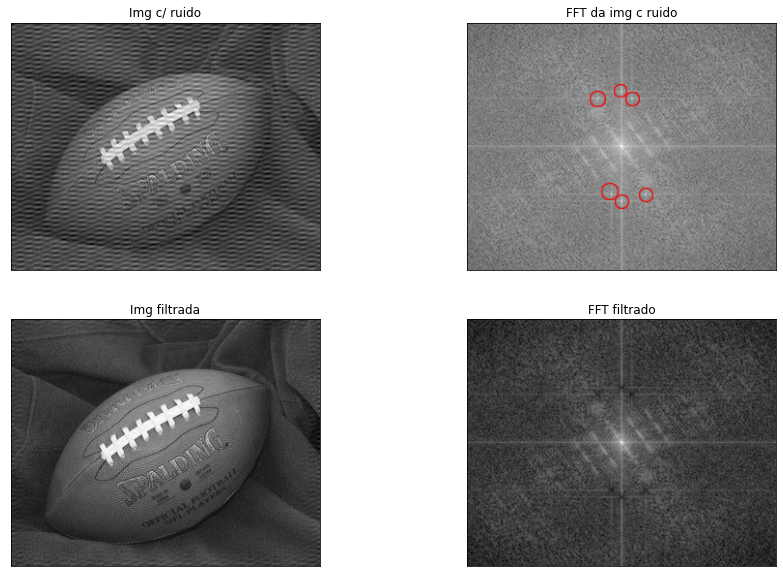

In [ ]:
imgnoiseball = io.imread('/content/noiseball.png')
imgnoise_spectrum = io.imread('/content/noise_spectrum.png')
imgfixed_ball = io.imread('/content/fixed_football.png')
imgfixed_spectrum = io.imread('/content/fixed_spectrum.png')
rcParams['figure.figsize'] = 15, 10

plt.subplot(221),plt.imshow(imgnoiseball, cmap = 'gray')
plt.title('Img c/ ruido'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(imgnoise_spectrum, cmap = 'gray')
plt.title('FFT da img c ruido'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(imgfixed_ball, cmap = 'gray')
plt.title('Img filtrada'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(imgfixed_spectrum, cmap = 'gray')
plt.title('FFT filtrado'), plt.xticks([]),plt.yticks([])

plt.show()

<h2>Exercício 5 - Melhoria de Imagem a la CSI</h2>
Você agora é um especialista em processamento de imagens para um departamento de investigação. Um detective abriu um caso antigo e parte de sua evidência é a foto de carro em um jornal (de papel). Você então é requisitado para fazer alguma mágica, tipo CSI, para tentar reconhecer a placa do carro ou tentar identificar o suspeito.

Pegue a imagem car_noise_pattern_halftone.png e utilize as técnicas anteriores (filtros de entalhe, suavização, etc) para restaurar a imagem.
Dicas:
crie uma função que receba uma lista de picos (onde estão os picos de ruídos) como um argumento;
os picos formam um padrão repetitivo. Descubra este padrão para economizar tempo.
Faça um ajuste fino nos seus filtros, mudando as larguras dos três tipos de filtros (D0) e experimentando, se necessário, alguma suavização no domínio da frequência. Você deve entregar a melhor solução para cada tipo de filtro.

Use um programa de processamento de imagens (Photoshop/Gimp) e faça uma suavização na imagem original. Você deve entregar esta imagem suavizada.